<h1 style="color: #2A8B66;">Movie Data Analysis</h1>
<h3>
Dataset from the MovieLens website to explore it using Pandas.
</h3>
<ul>
    <li><b>Data source: </b><span>filename ml-20m.zip</span></li>
    <li><b>Website: </b><a>https://grouplens.org/datasets/movielens/</a></li>
</ul>

#### imports

In [1]:
import pandas as pd

#### Show the content of the directory that it stores csv files

In [2]:
!ls ./movielens/

genome-scores.csv  links.csv   ratings.csv  tags.csv
genome-tags.csv    movies.csv  README.txt


#### Number of movies into "movies.csv" file

In [3]:
!echo "Number of movies:"
!cat ./movielens/movies.csv | wc -l

Number of movies:
27279


<h2 style="color: #2A738B;">Use Pandas to read the dataset</h2>
<ul>
    <li><b>ratings.csv: </b><span>userId,movieId,rating,timestamp</span></li>
    <li><b>tags.csv: </b><span>userId,movieId,tag,timestamp</span></li>
    <li><b>movies.csv: </b><span>movieId,title,genres</span></li>
</ul>

In [4]:
movies = pd.read_csv("./movielens/movies.csv", sep=",")
print(type(movies))
movies.head()

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
tags = pd.read_csv("./movielens/tags.csv", sep=",")
tags.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [6]:
ratings = pd.read_csv("./movielens/ratings.csv", sep=",")
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


### Series
#### Each row of the DataFrame is a Series object

In [7]:
tags_row_0 = tags.iloc[0]
print(type(tags_row_0))
tags_row_0

<class 'pandas.core.series.Series'>


userId                18
movieId             4141
tag          Mark Waters
timestamp     1240597180
Name: 0, dtype: object

In [8]:
tags_row_0.index

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [9]:
tags_row_0["movieId"]

4141

In [10]:
print("'tag' in tags_row_0? {0}".format("tag" in tags_row_0))
print("'rating' in tags_row_0? {0}".format("rating" in tags_row_0))

'tag' in tags_row_0? True
'rating' in tags_row_0? False


### DataFrame

In [11]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [12]:
tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

#### Descriptive Statistics

In [13]:
ratings["rating"].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [14]:
ratings["rating"].mean()

3.5255285642993797

In [15]:
ratings["rating"].min()

0.5

In [16]:
ratings["rating"].max()

5.0

In [17]:
ratings["rating"].std()

1.0519889192942424

In [18]:
ratings["rating"].mode()

0    4.0
dtype: float64

In [19]:
ratings.corr()

,userId,movieId,rating,timestamp
userId,1.000000,-0.000850,0.001175,-0.003101
movieId,-0.000850,1.000000,0.002606,0.459096
rating,0.001175,0.002606,1.000000,-0.000512
timestamp,-0.003101,0.459096,-0.000512,1.000000


In [20]:
# filter to check each element of the Pandas Series is greater than five
filter_1 = ratings["rating"] > 4
# check if any element into Pandas Series is True
print(filter_1.any())
# check if all elements into Pandas Series is True
print(filter_1.all())

True
False


<h2 style="color: #2A738B;">Data cleaning: Missing data into DataFrame</h2>

In [21]:
# any NULL value into movies DataFrame?
print("{0} rows".format(movies.shape[0]))
movies.isnull().any()

27278 rows


movieId    False
title      False
genres     False
dtype: bool

In [22]:
# any NULL value into ratings DataFrame?
print("{0} rows".format(ratings.shape[0]))
ratings.isnull().any()

20000263 rows


userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [23]:
# any NULL value into tags DataFrame?
print("{0} rows".format(tags.shape[0]))
tags.isnull().any()

465564 rows


userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [24]:
# drop rows with NULL values
tags = tags.dropna()

In [25]:
# check again if exist NULL values into tags DataFrame...
print("{0} rows".format(tags.shape[0]))
tags.isnull().any()

465548 rows


userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

<h2 style="color: #2A738B;">Data visualization</h2>

In [26]:
%matplotlib inline

### histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5f27cf048>]],
      dtype=object)

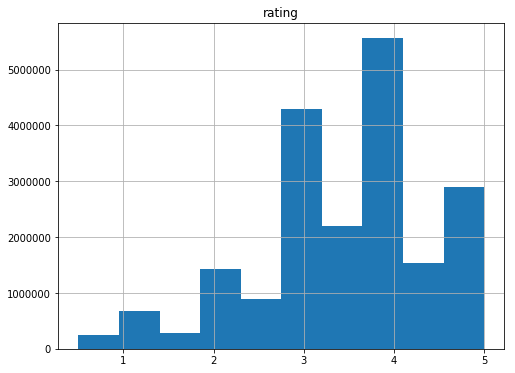

In [27]:
ratings.hist(column='rating', figsize=(8, 6))

### box

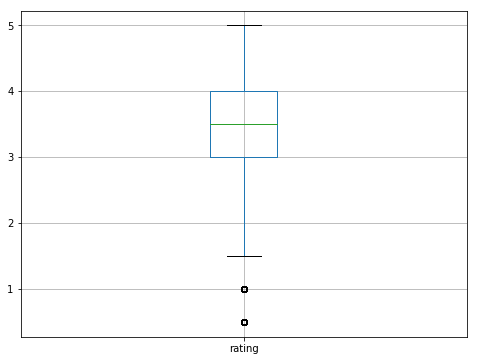

In [28]:
ratings.boxplot(column='rating', figsize=(8, 6))